You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [34]:
#!pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

tf.__version__

Now, it's time to load the dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
fashion_mnist

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [189]:
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:


As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

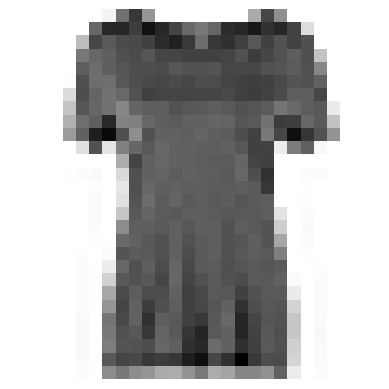

(28, 28)

In [190]:
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()
sample_image.shape

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [191]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [192]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


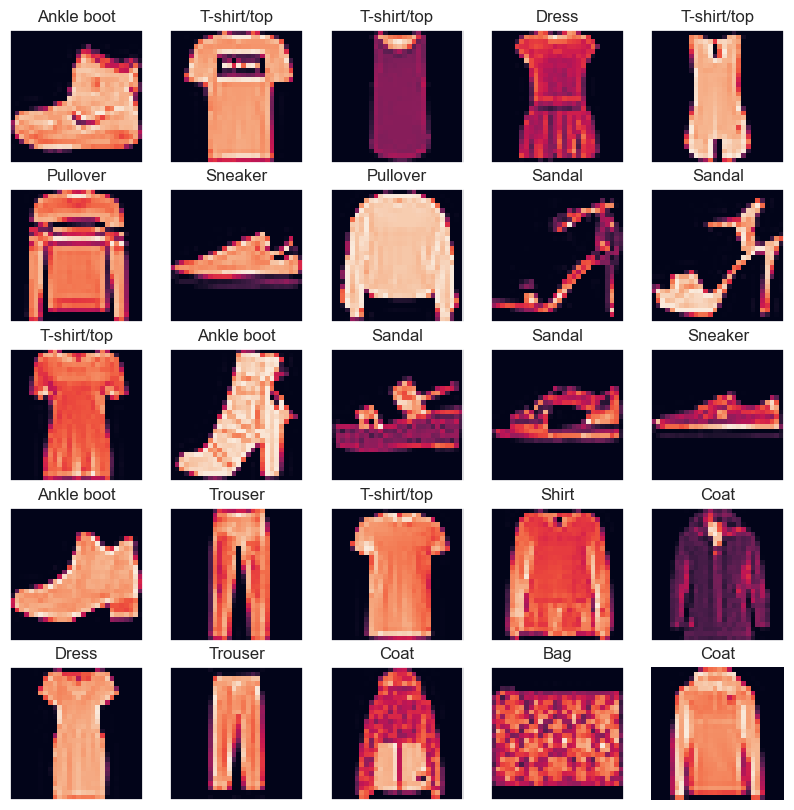

In [193]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i])
    axi.set_title(class_names[y_train[i]])
    axi.set(xticks=[], yticks=[])

plt.axis('off')
plt.show()

In [ ]:
X_train.data

### Importing necessary libraries and functions

In [195]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns; sns.set()
import os

from matplotlib import pyplot
from matplotlib.image import imread
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from PIL import Image, ImageOps

### Normalizing the dataset

In [196]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

### Converting 3D data to 2D

In [197]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### Model 1: Logistic Regression

In [ ]:
model_LR = LogisticRegression(max_iter = 1000)
model_LR.fit(X_train, y_train)

y_insample_LR = model_LR.predict(X_train)
y_outsample_LR = model_LR.predict(X_test)

pickle.dump(model_LR, open('model_LR.pkl', 'wb'))

### Logistic Regression outcomes

In sample accuracy: 88.09
Out-of-sample accuracy: 84.41

AUC for LR: 0.983

Confusion Matrix:
[[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  26   4   0   3   0   2   0]
 [ 24   3 739  10 124   0  87   1  12   0]
 [ 24  17  18 861  30   0  39   0  11   0]
 [  0   2 114  37 763   0  77   0   7   0]
 [  0   0   0   1   0 922   0  48   7  22]
 [143   1 122  39 100   0 572   0  23   0]
 [  0   0   0   0   0  34   0 940   0  26]
 [  7   1   8  14   4   6  22   5 933   0]
 [  0   1   0   0   0  12   1  39   0 947]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7     

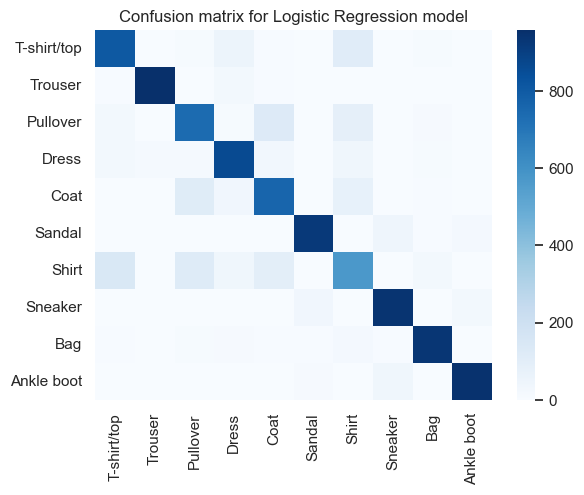

In [36]:
pickled_model_LR = pickle.load(open('model_LR.pkl', 'rb'))
pickled_model_LR.predict(X_test)

lr_cf_matrix = confusion_matrix(y_test, y_outsample_LR)

print("In sample accuracy:", accuracy_score(y_train, y_insample_LR, normalize = True) * 100)
print("Out-of-sample accuracy:",accuracy_score(y_test, y_outsample_LR, normalize = True) * 100)
print()
modelLR_auc = roc_auc_score(y_test, model_LR.predict_proba(X_test) ,multi_class = 'ovr') 
print("AUC for Logistic Regression: {:.3f}".format(modelLR_auc))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_outsample_LR))
print()
print()
print("Classification Report:")
print(classification_report(y_test, y_outsample_LR))

cm_LR = pd.DataFrame(lr_cf_matrix, index = class_names, columns = class_names)
sns.heatmap(cm_LR, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Logistic Regression model')
plt.show()

### Model 2: Gaussian Naive

In [35]:
model_GN = GaussianNB()
model_GN.fit(X_train, y_train)

y_insample_GN = model_GN.predict(X_train)
y_outsample_GN = model_GN.predict(X_test)

pickle.dump(model_GN, open('model_GN.pkl', 'wb'))

### Gaussian Naive outcomes

In sample accuracy: 58.778333333333336
Out-of-sample accuracy: 58.56

AUC for GN: 0.895

Confusion Matrix:
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
    

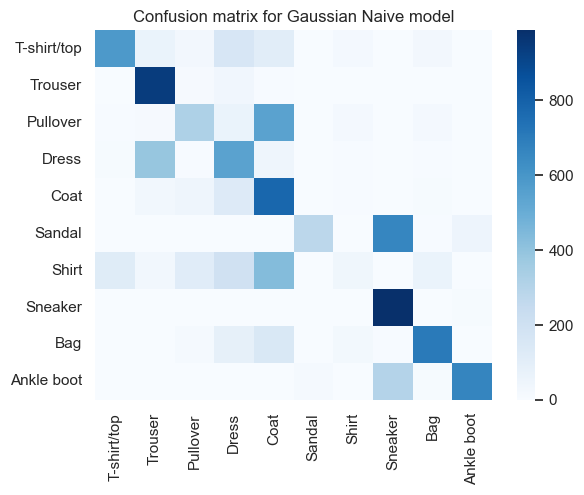

In [37]:
pickled_model_GN = pickle.load(open('model_GN.pkl', 'rb'))
pickled_model_GN.predict(X_test)

gn_cf_matrix = confusion_matrix(y_test, y_outsample_GN)

print("In sample accuracy:", accuracy_score(y_train, y_insample_GN, normalize = True) * 100)
print("Out-of-sample accuracy:",accuracy_score(y_test, y_outsample_GN, normalize = True) * 100)
print()
modelGN_auc = roc_auc_score(y_test, model_GN.predict_proba(X_test) ,multi_class = 'ovr') 
print("AUC for Gaussian Naive: {:.3f}".format(modelGN_auc))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_outsample_GN))
print()
print()
print("Classification Report:")
print(classification_report(y_test, y_outsample_GN))

cm_GN = pd.DataFrame(gn_cf_matrix, index = class_names, columns = class_names)
sns.heatmap(cm_GN, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Gaussian Naive model')
plt.show()

### Model 3: K-NN

In [51]:
model_KNN = KNeighborsClassifier()     
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,9]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid = GridSearchCV(model_KNN, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid.fit(X_train, y_train)
model_KNN.fit(X_train, y_train)

y_insample_KNN = grid.predict(X_train)
y_outsample_KNN = grid.predict(X_test)

KNN_bestModel = grid.best_estimator_
best_y_train_KNN = KNN_bestModel.predict(X_train)
best_y_test_KNN = KNN_bestModel.predict(X_test)

pickle.dump(grid, open('model_KNN.pkl', 'wb'))

### K-NN outcomes

Best Parameter: {'n_neighbors': 4}
Best Cross Validation Score: 0.8570166666666665

In sample accuracy: 90.82166666666667
Out-of-sample accuracy: 85.77

Best In sample accuracy: 90.82166666666667
Best Out-of-sample accuracy: 85.77

AUC for KNN: 0.969

Best AUC for KNN: 0.965

Confusion Matrix:
[[886   1  20  14   3   1  72   1   2   0]
 [  8 971   3  10   4   0   3   0   1   0]
 [ 27   2 831  11  69   0  60   0   0   0]
 [ 48   7  15 868  25   0  34   0   3   0]
 [  4   1 151  32 743   0  67   0   2   0]
 [  2   0   0   0   0 855   4  77   0  62]
 [198   2 143  22  79   0 545   0  11   0]
 [  0   0   0   0   0   4   0 971   0  25]
 [  3   0  13   3   5   0  18   7 951   0]
 [  0   0   0   0   0   1   1  42   0 956]]


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.71      0.83      0.76      1000
           3       0.90      0.8

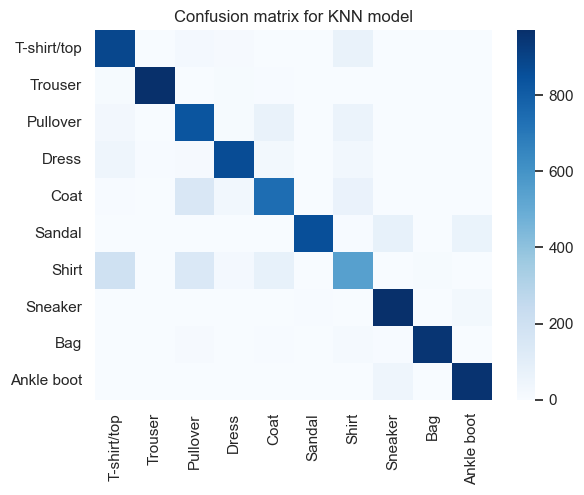

In [52]:
pickled_model_KNN = pickle.load(open('model_KNN.pkl', 'rb'))
pickled_model_KNN.predict(X_test)

knn_cf_matrix = confusion_matrix(y_test, y_outsample_KNN)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Validation Score: {}".format(grid.best_score_))
print()
print("In sample accuracy:", accuracy_score(y_train, y_insample_KNN, normalize = True) * 100)
print("Out-of-sample accuracy:",accuracy_score(y_test, y_outsample_KNN, normalize = True) * 100)
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_KNN, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_KNN, normalize = True) * 100)
print()
modelKNN_auc = roc_auc_score(y_test, model_KNN.predict_proba(X_test) ,multi_class = 'ovr') 
print("AUC for KNN: {:.3f}".format(modelKNN_auc))
print()
bestmodelKNN_auc = roc_auc_score(y_test, KNN_bestModel.predict_proba(X_test) ,multi_class = 'ovr') 
print("Best AUC for KNN: {:.3f}".format(bestmodelKNN_auc))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_outsample_KNN))
print()
print()
print("Classification Report:")
print(classification_report(y_test, y_outsample_KNN))

cm_KNN = pd.DataFrame(knn_cf_matrix, index = class_names, columns = class_names)
sns.heatmap(cm_KNN, annot = False, cmap = "Blues")
plt.title('Confusion matrix for KNN model')
plt.show()

### Model 4: Decision Tree

In [198]:
model_DT = DecisionTreeClassifier(class_weight = "balanced", splitter = 'best')
param_grid = {'max_depth': [5, 11, 13, 17]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid2 = GridSearchCV(model_DT, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid2.fit(X_train, y_train)
model_DT.fit(X_train, y_train)

y_insample_DT = model_DT.predict(X_train)
y_outsample_DT = model_DT.predict(X_test)

DT_bestModel = grid2.best_estimator_
best_y_train_DT = DT_bestModel.predict(X_train)
best_y_test_DT = DT_bestModel.predict(X_test)

pickle.dump(grid2, open('model_DT.pkl', 'wb'))

### Decision Tree outcomes

Best Parameter: {'max_depth': 13}
Best Cross Validation Score: 0.8165000000000001

In sample accuracy: 100.0
Out-of-sample accuracy: 79.31

Best In sample accuracy: 90.71166666666667
Best Out-of-sample accuracy: 80.96

AUC for Decision tree: 0.885

Best AUC for Decision tree: 0.940

Confusion Matrix:
[[785   5  24  34  11   1 131   1   6   2]
 [  3 941   5  26   6   0  16   0   2   1]
 [ 13   1 696  18 164   0  98   0   8   2]
 [ 46  21  21 794  71   1  35   0  11   0]
 [  4   2 143  39 720   0  90   0   2   0]
 [  1   3   1   3   0 888   2  56  16  30]
 [150   6 149  34 109   3 530   1  16   2]
 [  0   0   0   0   0  35   0 909   7  49]
 [  5   4  16   7   9   7  23   8 916   5]
 [  1   0   1   0   0  20   0  57   4 917]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1000
           1       0.96      0.94      0.95      1000
           2       0.66      0.70      0.68      1000
           3       0.83  

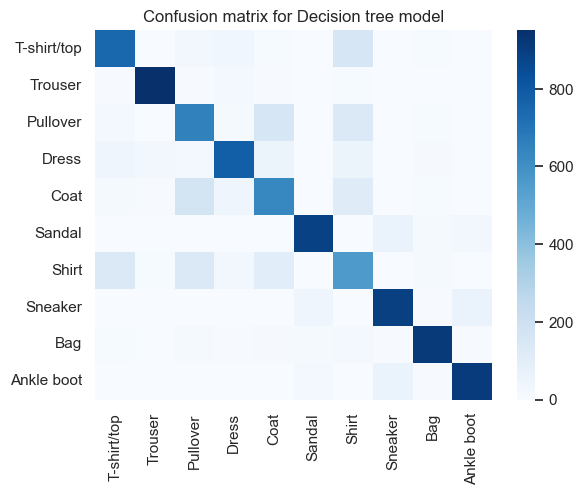

In [200]:
pickled_model_DT = pickle.load(open('model_DT.pkl', 'rb'))
pickled_model_DT.predict(X_test)

dt_cf_matrix = confusion_matrix(y_test, y_outsample_DT)

print("Best Parameter: {}".format(grid2.best_params_))
print("Best Cross Validation Score: {}".format(grid2.best_score_))
print()
print("In sample accuracy:", accuracy_score(y_train, y_insample_DT, normalize = True) * 100)
print("Out-of-sample accuracy:",accuracy_score(y_test, y_outsample_DT, normalize = True) * 100)
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_DT, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_DT, normalize = True) * 100)
print()
modelDT_auc = roc_auc_score(y_test, model_DT.predict_proba(X_test) ,multi_class = 'ovr') 
print("AUC for Decision tree: {:.3f}".format(modelDT_auc))
print()
bestmodelDT_auc = roc_auc_score(y_test, DT_bestModel.predict_proba(X_test) ,multi_class = 'ovr') 
print("Best AUC for Decision tree: {:.3f}".format(bestmodelDT_auc))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_DT))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_DT))

cm_DT = pd.DataFrame(dt_cf_matrix, index = class_names, columns = class_names)
sns.heatmap(cm_DT, annot = False, cmap = "Blues")
plt.title('Confusion matrix for Decision tree model')
plt.show()

### Model 5: Random Forest

In [202]:
model_RF = RandomForestClassifier()
param_grid = {'n_estimators' : [30,50,70,90,110,130,150], 'max_depth' : [5,7,9,11,13]}
cv = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)
grid3 = GridSearchCV(model_RF, param_grid, cv = cv, scoring = 'accuracy', return_train_score = True)
grid3.fit(X_train, y_train)
model_RF.fit(X_train, y_train)

y_insample_RF = grid3.predict(X_train)
y_outsample_RF = grid3.predict(X_test)

RF_bestModel = grid3.best_estimator_
best_y_train_RF = RF_bestModel.predict(X_train)
best_y_test_RF = RF_bestModel.predict(X_test)

pickle.dump(grid, open('model_RF.pkl', 'wb'))

### Random Forest outcomes

Best Parameter: {'max_depth': 13, 'n_estimators': 150}
Best Cross Vlidation Score: 0.8708833333333332

In sample accuracy: 93.65166666666667
Out-of-sample accuracy: 86.2

Best In sample accuracy: 93.65166666666667
Best Out-of-sample accuracy: 86.2

AUC for RF: 0.989

Best AUC for RF: 0.988

Confusion Matrix:
[[852   0  16  41   5   1  74   0  11   0]
 [  3 951   6  28   5   0   5   0   2   0]
 [ 13   0 767  11 155   0  51   0   3   0]
 [ 22   3  11 904  33   0  25   0   2   0]
 [  0   1  93  38 812   0  54   0   2   0]
 [  0   0   0   1   0 943   0  40   1  15]
 [166   1 137  35 103   0 539   0  19   0]
 [  0   0   0   0   0   6   0 941   0  53]
 [  0   2   7   2   6   2  10   5 966   0]
 [  0   0   0   0   0   7   1  45   2 945]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.95      0.97      1000
           2       0.74      0.77      0.75      1000
           3     

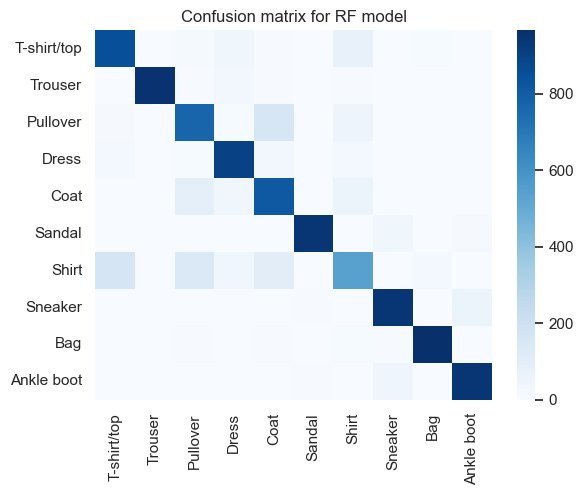

In [204]:
pickled_model_RF = pickle.load(open('model_RF.pkl', 'rb'))
pickled_model_RF.predict(X_test)

rf_cf_matrix = confusion_matrix(y_test, y_outsample_RF)

print("Best Parameter: {}".format(grid3.best_params_))
print("Best Cross Vlidation Score: {}".format(grid3.best_score_))
print()
print("In sample accuracy:", accuracy_score(y_train, y_insample_RF, normalize = True) * 100)
print("Out-of-sample accuracy:",accuracy_score(y_test, y_outsample_RF, normalize = True) * 100)
print()
print("Best In sample accuracy:", accuracy_score(y_train, best_y_train_RF, normalize = True) * 100)
print("Best Out-of-sample accuracy:",accuracy_score(y_test, best_y_test_RF, normalize = True) * 100)
print()
modelRF_auc = roc_auc_score(y_test, model_RF.predict_proba(X_test) ,multi_class = 'ovr') 
print("AUC for RF: {:.3f}".format(modelRF_auc))
print()
bestmodelRF_auc = roc_auc_score(y_test, RF_bestModel.predict_proba(X_test) ,multi_class = 'ovr') 
print("Best AUC for RF: {:.3f}".format(bestmodelRF_auc))
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_y_test_RF))
print()
print()
print("Classification Report:")
print(classification_report(y_test, best_y_test_RF))

cm_RF = pd.DataFrame(rf_cf_matrix, index = class_names, columns = class_names)
sns.heatmap(cm_RF, annot = False, cmap = "Blues")
plt.title('Confusion matrix for RF model')
plt.show()

Here, I've implemented supervised learning techniques such as Logistic regression, Gaussian Naive, KNN, Decision tree and Random Forest to fashion mnist dataset which has images of fashion items with their labels. After dividing dataset  into train and test images were normalized and converted to 2D. Furthermore to enhace the outcomes of supervised learning methodologies grid search and cross validation was applied to the developed models along with certain hyperparameters.


Among all the models implemented Random Forest model stood out with best parameters performance such at maximum depth = 13 and estimator = 150 i.e., this model has minimal complexity, bias and almost minimal variance. It's best cross validation score of ~0.87 which is slightly better from KNN model with best accuracy of 86.19 results shows ~86% time random forest model would correctly idntify the image of any fashion items. Alongside it's precision of 0.86 (i.e., among all the items that we are going to predict how many of them would be correct) and recall rate of 0.86 which is almost similar to that of KNN model.

<center><b>Table for Model Comparison </b>

|        Model      ||Best Parameter   |Best CV Score|Out-sample accuracy|Best Out-sample accuracy|Best AUC|
|-------------------||-----------------|-------------|-------------------|------------------------|--------|
|Logistic Regression||      NA         |      NA     |        84.41      |           NA           |  0.983 |
|Gaussian Naive     ||      NA         |      NA     |        58.56      |           NA           |  0.895 |
|KNN                || neighbour = 4   |    0.8570   |        85.77      |          85.77         |  0.965 |
|Decision Tree      ||max_depth = 13   |    0.8165   |        79.31      |          80.96         |  0.940 |
|Random Forest      ||max_depth = 13 & |    0.8708   |        86.20      |          86.20         |  0.988 |
|                   ||n_estimator=150  |             |                   |                        |        |

### Loading, Grayscaling, Resizing and Visualizing images

Here we would be loading the picture clicked by mobile camera and converting them to 2D post that will gray scale all those images and visualize them side by side.

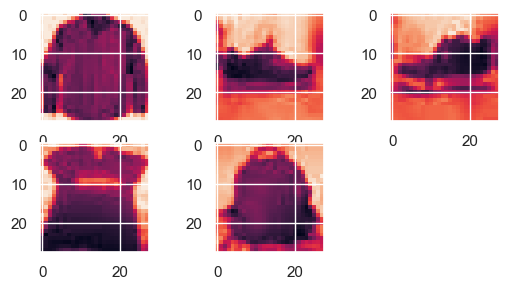

In [167]:
path_directory = "./Camera images"

img = Image.open('./Camera images/Bag.jpg').convert('L').resize((28,28))
img.save('./Camera images/Bag.jpg')
img = Image.open('./Camera images/Shirt.jpg').convert('L').resize((28,28))
img.save('./Camera images/Shirt.jpg')
img = Image.open('./Camera images/Shoes.jpg').convert('L').resize((28,28))
img.save('./Camera images/Shoes.jpg')
img = Image.open('./Camera images/Sneaker.jpg').convert('L').resize((28,28))
img.save('./Camera images/Sneaker.jpg')
img = Image.open('./Camera images/Tshirt.jpg').convert('L').resize((28,28))
img.save('./Camera images/Tshirt.jpg')

images = os.listdir(path_directory)
directory = [os.path.join(path_directory + "/" + i) for i in images]
k = 0
for i in directory:
    k = k+1
    plt.subplot(3,3,k)
    plt.imshow(imread(i))
plt.show()

(0, 'Shirt.jpg')
(1, 'Shoes.jpg')
(2, 'Sneaker.jpg')
(3, 'Tshirt.jpg')
(4, 'Bag.jpg')


/var/folders/fy/d33_lltx6_56lqmgmys5pz1w0000gn/T/ipykernel_51927/1704462179.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  list_image=list_image.append(images)
/var/folders/fy/d33_lltx6_56lqmgmys5pz1w0000gn/T/ipykernel_51927/1704462179.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  list_image=list_image.append(images)
/var/folders/fy/d33_lltx6_56lqmgmys5pz1w0000gn/T/ipykernel_51927/1704462179.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  list_image=list_image.append(images)


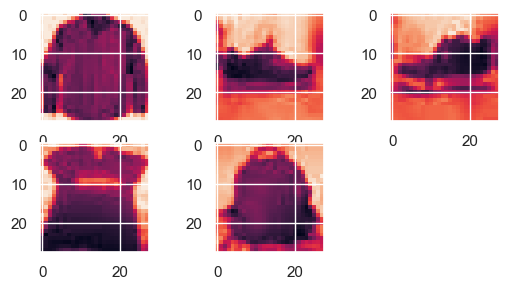

In [177]:
folder = './Camera images/'

list_image = pd.DataFrame()
for i in enumerate(os.listdir(folder)[0:9]):
    print(i)
   
    pyplot.subplot(330 + 1 + i[0])   
    image = imread(folder + i[1])

    pyplot.imshow(image)
    images = pd.DataFrame(Image_check)
    list_image = list_image.append(images)

In [179]:
list_image.shape

(5, 784)

### Predicting the image

In [229]:
ytest_hat1 = pickled_model_LR.predict(list_image)
print(ytest_hat1)
ytest_hat2 = pickled_model_GN.predict(list_image)
print(ytest_hat2)
ytest_hat3 = pickled_model_KNN.predict(list_image)
print(ytest_hat3)
ytest_hat4 = pickled_model_DT.predict(list_image)
print(ytest_hat4)
ytest_hat5 = pickled_model_RF.predict(list_image)
print(ytest_hat5)

[8 8 8 8 8]
[6 6 6 6 6]
[8 8 8 8 8]
[0 0 0 0 0]
[8 8 8 8 8]


### Verifying model accuracy

In [230]:
y_test = [6,9,6,0,8]
AccuLR = accuracy_score(y_test, ytest_hat1, normalize = True) * 100
print("Accuracy of model:", AccuLR)
AccuGN = accuracy_score(y_test, ytest_hat2, normalize = True) * 100
print("Accuracy of model:", AccuGN)
AccuKNN = accuracy_score(y_test, ytest_hat3, normalize = True) * 100
print("Accuracy of model:", AccuKNN)
AccuDT = accuracy_score(y_test, ytest_hat4, normalize = True) * 100
print("Accuracy of model:", AccuDT)
AccuRF = accuracy_score(y_test, ytest_hat5, normalize = True) * 100
print("Accuracy of model:", AccuRF)

Accuracy of model: 20.0
Accuracy of model: 40.0
Accuracy of model: 20.0
Accuracy of model: 20.0
Accuracy of model: 20.0


Here, we can observe the highest accuracy for Gaussian Naive model which is not reasonable. As, it is just comparing the class_names with the label names but unable to correctly classify camera generated image. It can be seen that we have highly distorted. Thus, we can say that with high classification rate, true positive rate and correct prediction of such distored images Random Forest model still stand out.